In [119]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [175]:
#import the training data
raw_data = pd.read_csv('train.csv')
raw_data

#import the testing data
test_data = pd.read_csv('test.csv')

In [177]:
print(f'Train shape: {raw_data.shape}')
print(f'Test shape: {test_data.shape}')

Train shape: (4209, 378)
Test shape: (4209, 377)


In [178]:
print(f'The shape of the dataset is:{raw_data.shape}')

The shape of the dataset is:(4209, 378)


In [179]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [180]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [181]:
raw_data.describe()

ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 370 columns]

### If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [182]:
#get the variance of each columns 

for i in raw_data.columns:
    if raw_data[i].dtype == "int" or raw_data[i].dtype == "float":
        variance = (raw_data[i].mean()**2)/raw_data[i].shape[0]
        #print(variance)
        if variance == 0:
            raw_data = raw_data.drop(i, axis=1)
            test_data = test_data.drop(i, axis=1)

            
            
#for i in test_data.columns:
#    if test_data[i].dtype == "int" or test_data[i].dtype == "float":
#        variance = (test_data[i].mean()**2)/test_data[i].shape[0]
        
#        if variance == 0:
#            test_data = test_data.drop(i, axis=1)

            


In [183]:
print(f'Train shape: {raw_data.shape}')
print(f'Test shape: {test_data.shape}')

Train shape: (4209, 366)
Test shape: (4209, 365)


13 columns has been delete.

### Check for null and unique values for test and train sets.

In [184]:
#check for null values in the train dataset

raw_data.isnull().sum()

nb =0
for i in raw_data.columns:
    if raw_data[i].isnull().sum() == True:
        print(raw_data[i])
    else:
        nb +=1
if nb == raw_data.shape[1]:
    print('There are no null values in the train sets.')


There are no null values in the train sets.


In [185]:
#check for null values
nb =0
for i in test_data.columns:
    if test_data[i].isnull().sum() == True:
        print(test_data[i])
    else:
        nb +=1
if nb == test_data.shape[1]:
    print('There are no null values in the test sets.')


There are no null values in the test sets.


In [186]:
#Check for unique values in the train sets

#first let's drop the target and id columns
X = raw_data.drop(['ID','y'], axis=1)
y = raw_data['y']

for i in X.columns:
    print(X[i].unique(), '\t', X[i].nunique())

['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab'] 	 47
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab'] 	 27
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar'] 	 44
['a' 'e' 'c' 'f' 'd' 'b' 'g'] 	 7
['d' 'b' 'c' 'a'] 	 4
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa'] 	 29
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b'] 	 12
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c'] 	 25
[0 1] 	 2
[0 1] 	 2
[1 0] 	 2
[0 1] 	 2
[0 1] 	 2
[0 1] 	 2
[0 1] 	 2
[1 0] 	 2
[0 1] 	 2
[0 1] 	 2
[1 0] 

In [187]:
#Check for unique values in the test sets

for i in test_data.columns:
    print(test_data[i].unique(), '\t', test_data[i].nunique())

[   1    2    3 ... 8413 8414 8416] 	 4209
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb'] 	 49
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab'] 	 27
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u'] 	 45
['f' 'a' 'c' 'e' 'd' 'g' 'b'] 	 7
['d' 'b' 'a' 'c'] 	 4
['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa'] 	 32
['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b'] 	 12
['w' 'y' 'j' 'n' 'm' 's' 'a' 'v' 'r' 'o' 't' 'h' 'c' 'k' 'p' 'u' 'd' 'g'
 'b' 'q' 'e' 'l' 'f' 'i' 'x'] 	 25
[0 1] 	 2
[0 1] 	 2
[0 1] 	 2
[0 1

### Apply label encoder.

In [188]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [189]:
X.X5.dtype


dtype('O')

In [190]:
nb = 0
for i in X.columns:
    if X[i].dtype=='O':
        X[i] = le.fit_transform(X[i])
        


In [191]:
test = test_data.drop(['ID'], axis=1)
for i in test.columns:
    if test[i].dtype=='O':
        test[i] = le.fit_transform(test[i])

### Perform dimensionality reduction.

In [192]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
pca = PCA()

In [193]:
pca.fit(X)
pca.fit(test)
#pca.explained_variance_ratio_
#pca.explained_variance_

PCA()

In [194]:
#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [195]:
#transform the X_train and the X_test

X_train_transformed = pd.DataFrame(pca.fit_transform(X_train))
X_test_transformed = pd.DataFrame(pca.fit_transform(X_test))

test_transformed = pd.DataFrame(pca.fit_transform(test))

In [196]:
print(f'Features train set shape: {X_train_transformed.shape}')
print(f'Features test set shape: {X_test_transformed.shape}')

Features train set shape: (2946, 364)
Features test set shape: (1263, 364)


In [197]:
print(f'Target train set: {y_train.shape}')
print(f'Target test set: {y_test.shape}')

Target train set: (2946,)
Target test set: (1263,)


In [199]:
test_transformed.shape

(4209, 364)

In [143]:
#pip install xgboost

### Predict your test_df values using xgboost

In [144]:
#from xgboost import XGBClassifier
#from xgboost import XGBClassifier
import xgboost as xgb 
from sklearn import model_selection


train_matrix = xgb.DMatrix(data=X_train_transformed, label=y_train)
test_matrix = xgb.DMatrix(data=X_test_transformed, label=y_test)
df_test_matrix = xgb.DMatrix(data=test_transformed)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 10, 'alpha': 10}


[14:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:24] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is no

In [145]:
#k-fold Cross Validation using XGBoost
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        90.994435        0.075081       90.991879       0.745108
1        82.043137        0.069897       82.022413       0.741510
2        73.997967        0.060785       73.985506       0.740383
3        66.766132        0.058146       66.764758       0.735974
4        60.266244        0.052806       60.279647       0.725283

In [166]:
rmse = cv_results["test-rmse-mean"].tail(1)
rmse = rmse.values[0]
print(f'The Root Mean Squared Error is: {rmse:.2f} .')


The Root Mean Squared Error is: 8.94 .


#### Plot the most importent features.

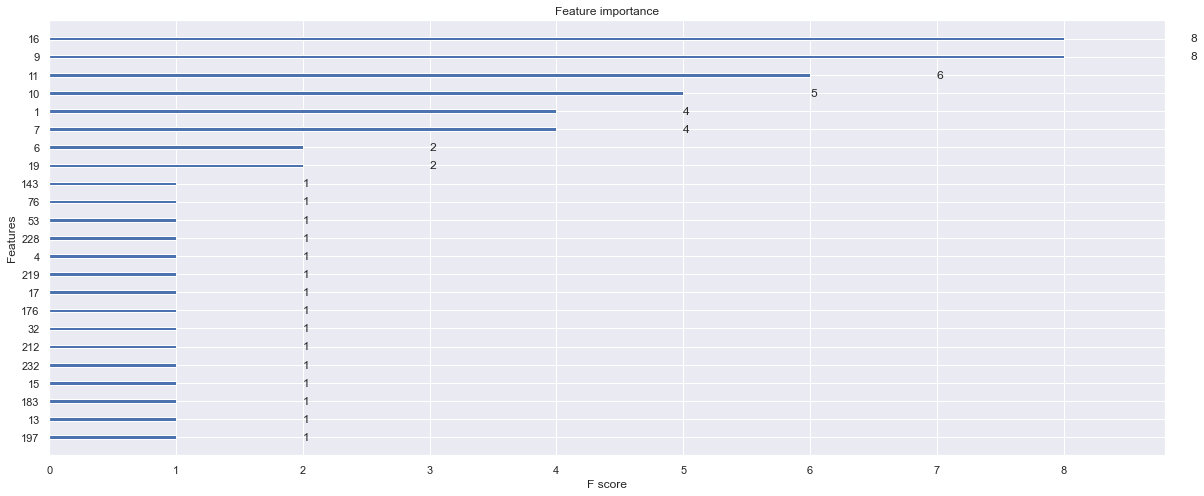

In [171]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

### Predict the test dataset.

In [172]:
xg_reg = xgb.train(params=params, dtrain=train_matrix, num_boost_round=10)

[14:22:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [173]:
test_prediction = xg_reg.predict(df_test_matrix)

In [174]:
test_file = pd.DataFrame()
test_file['ID'] = test_data['ID']
test_file['y']= test_prediction

test_file.to_csv('xgb_prediction.csv',index=False)
test_file.head()

ID          y
0   1  56.122471
1   2  68.292252
2   3  57.715340
3   4  54.696907
4   5  64.332222